In [0]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")

from scipy.stats import zscore
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.model_selection  import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
import math

In [0]:
#loading data
df = pd.read_csv("/content/Bank_Personal_Loan_Modelling.csv")
df.columns = ["ID", "Age", "Experience", "Income", "ZIPCode", "Family", "CCAvg", "Education", "Mortgage", 
                "PersonalLoan", "SecuritiesAccount", "CDAccount", "Online", "CreditCard"]

In [3]:
#First 5 rows
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
#Column names
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'PersonalLoan', 'SecuritiesAccount',
       'CDAccount', 'Online', 'CreditCard'],
      dtype='object')

# Column Information
1. ID: Customer ID
2. Age: Customer's age in completed years
3. Experience: Number of years of professional experience
4. Income: Annual income of the customer 
5. ZIPCode: Home Address ZIP code.
6. Family: Family size of the customer
7. CCAvg: spending on credit cards per month 
8. Education: Education Level. 
  * 1: Undergrad 
  * 2: Graduate
  * 3: Advanced/Professional
9. Mortgage: Mortgage Value of house mortgage if any. 
10. PersonalLoan: Did this customer accept the personal loan offered in the last campaign?
11. SecuritiesAccount: Does the customer have a securities account with the bank?
12. CDAccount: Does the customer have a certificate of deposit (CD) account with the bank?
13. Online: Does the customer use internet banking facilities?
14. CreditCard: Does the customer uses a credit card issued by UniversalBank?

In [5]:
#Shape of data (nrows, ncols)
df.shape

(5000, 14)

In [6]:
#dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                   5000 non-null int64
Age                  5000 non-null int64
Experience           5000 non-null int64
Income               5000 non-null int64
ZIPCode              5000 non-null int64
Family               5000 non-null int64
CCAvg                5000 non-null float64
Education            5000 non-null int64
Mortgage             5000 non-null int64
PersonalLoan         5000 non-null int64
SecuritiesAccount    5000 non-null int64
CDAccount            5000 non-null int64
Online               5000 non-null int64
CreditCard           5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


# Observation
No null values in any column and CCAvg column has float64 datatype

In [7]:
#checking for null values
df.apply(lambda x:sum(x.isnull()))

ID                   0
Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

# Observation
Found 0 Null values

In [8]:
#Checking unique values
df.apply(lambda x: len(x.unique()))

ID                   5000
Age                    45
Experience             47
Income                162
ZIPCode               467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
PersonalLoan            2
SecuritiesAccount       2
CDAccount               2
Online                  2
CreditCard              2
dtype: int64

In [9]:
#stats about data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


# Observation
Minimum value of Experience is -3 which is not possible

In [10]:
#Checking for negative values in Experience
df[df["Experience"] < 0]["Experience"].count()

52

# Observation
There are total 52 negative values in Experience column

In [0]:
#Making a list of indexs which has negative values
dfPosExp = df.loc[df["Experience"] > 0]
negExp = df.Experience < 0
column_name = "Experience"
mylist = df.loc[negExp]["ID"].tolist()

In [0]:
#Replacing negative values with Median of positive experience
for id in mylist:
  age = df.loc[np.where(df["ID"]==id)]["Age"].tolist()[0]
  df_filtered = dfPosExp[(dfPosExp.Age == age)]
  exp = df_filtered['Experience'].median()
  df.loc[df.loc[np.where(df['ID']==id)].index, 'Experience'] = exp

In [13]:
#Checking if we still have negative experience
df[df['Experience'] < 0]['Experience'].count()

0

# Observation
Now we don't have any negative value in Experience column

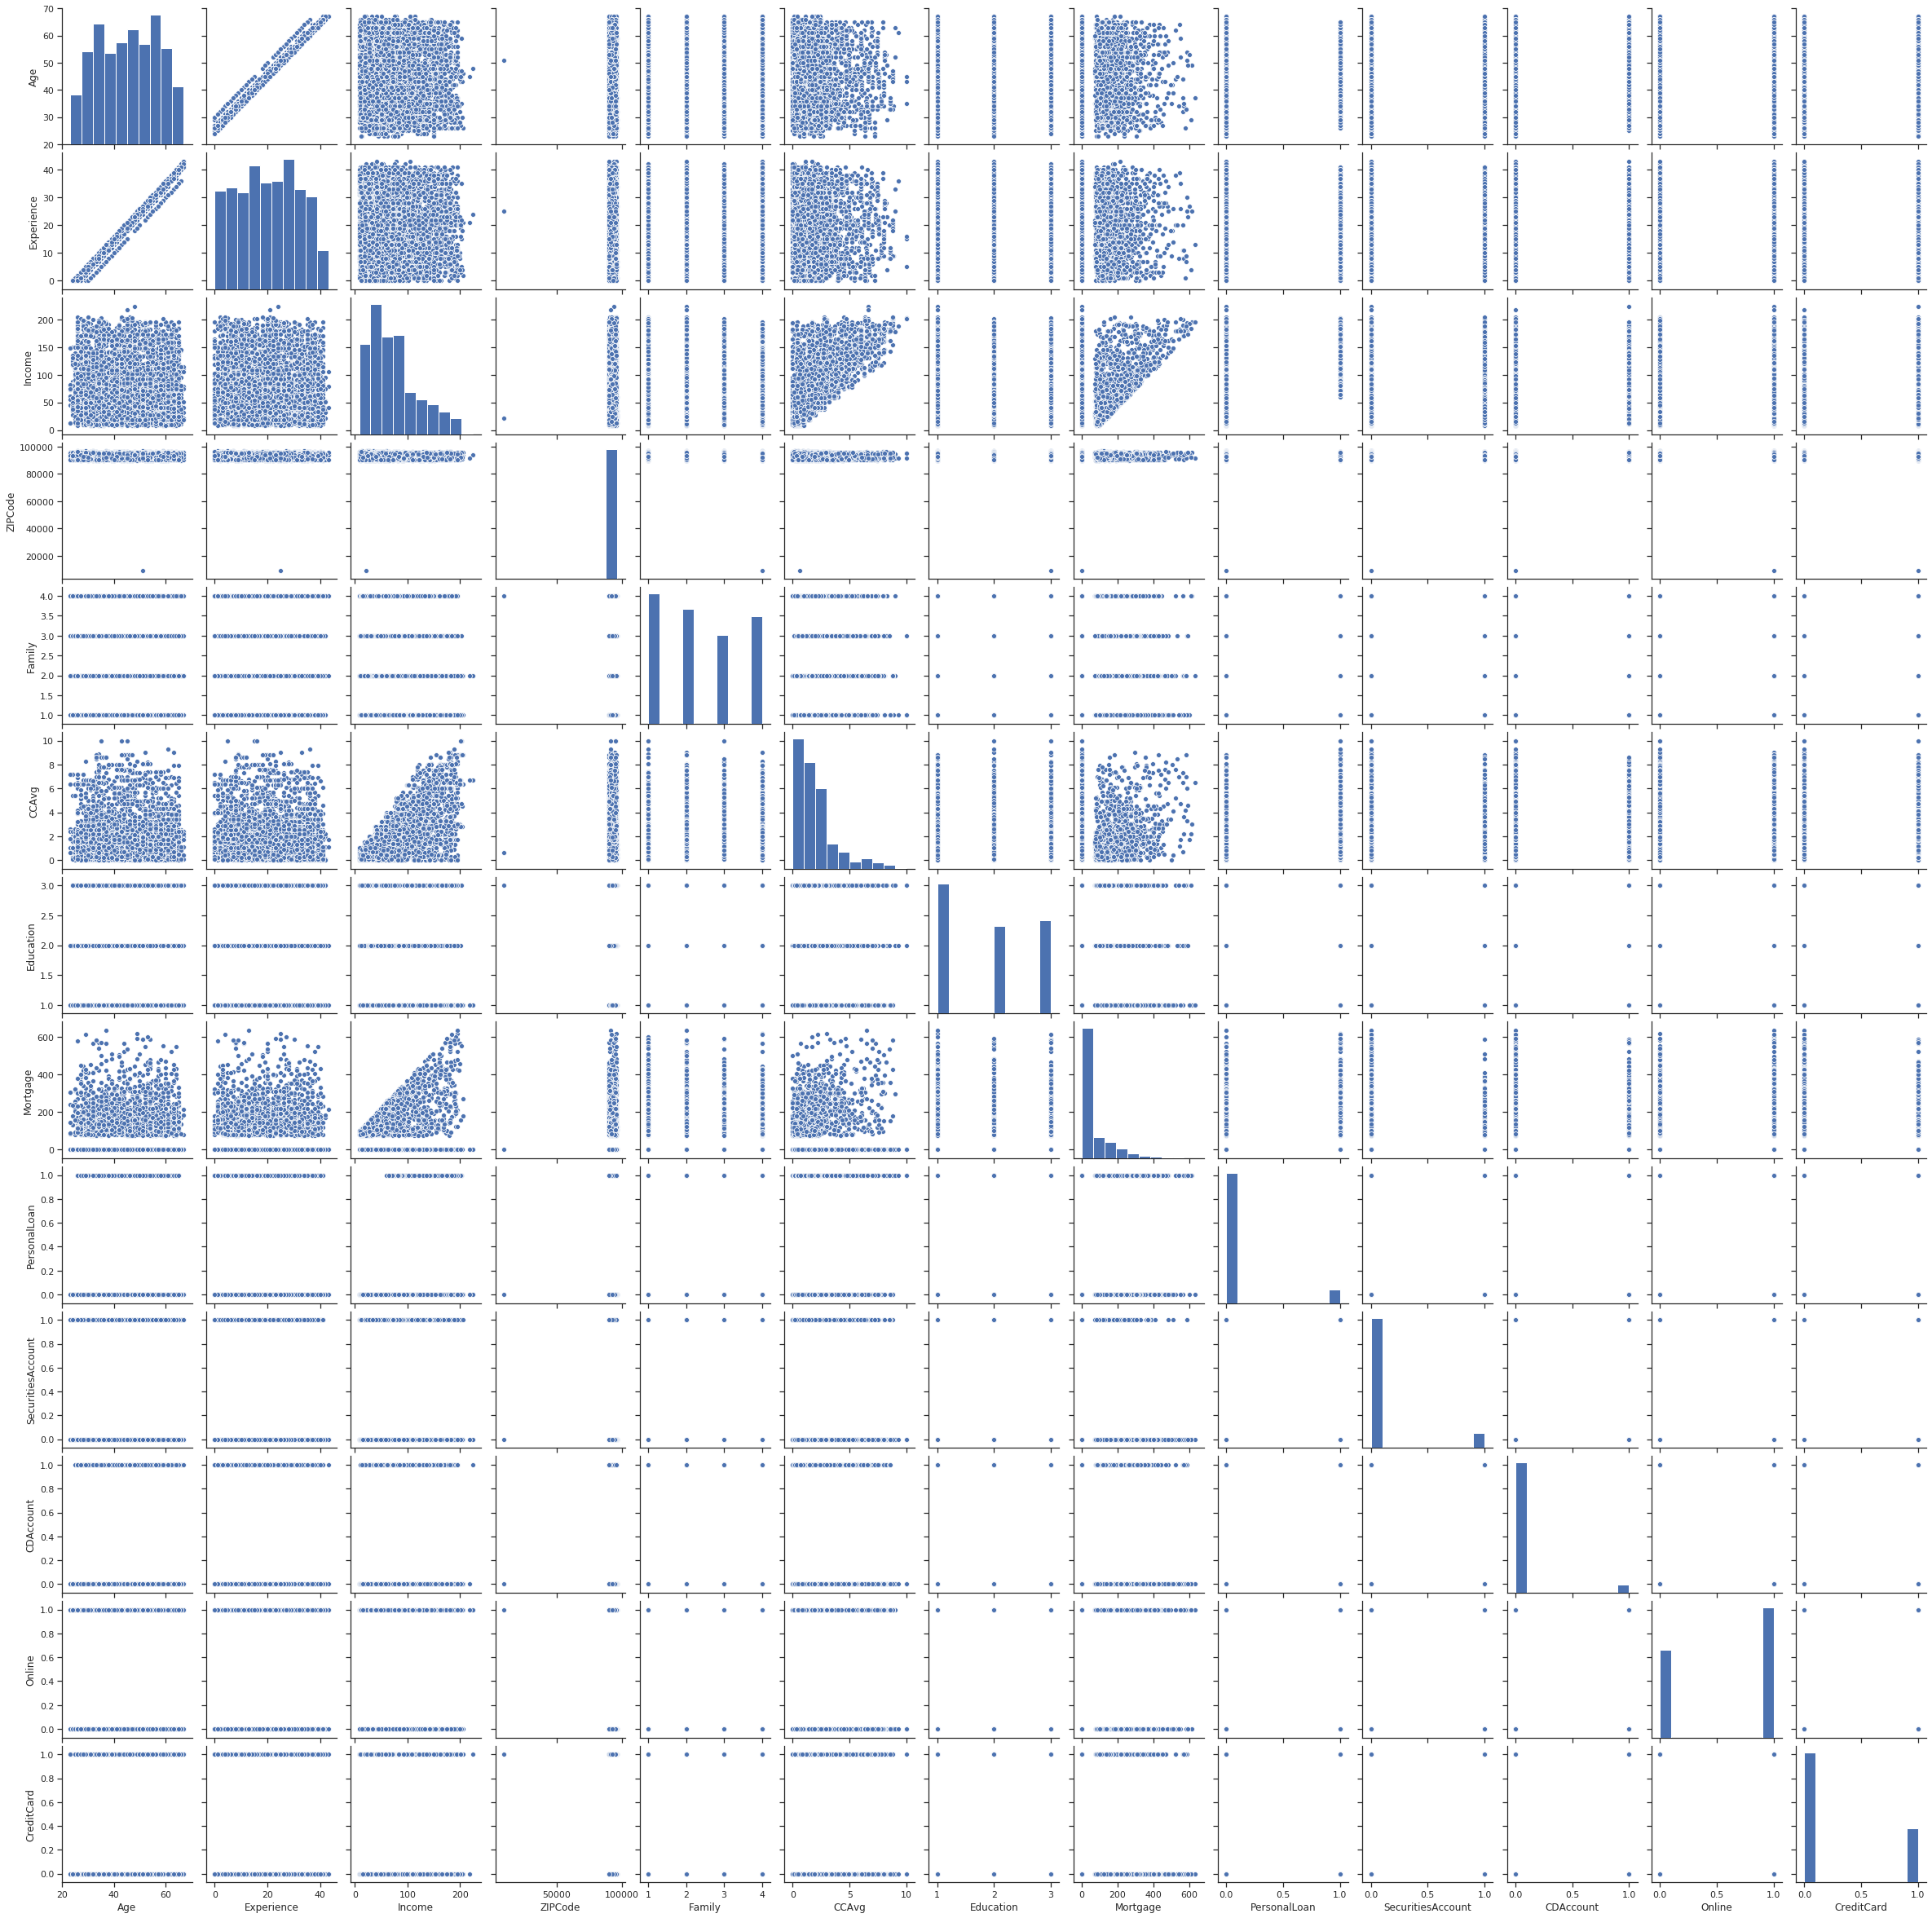

In [14]:
#Distribution chart
sns.pairplot(df.iloc[:,1:])

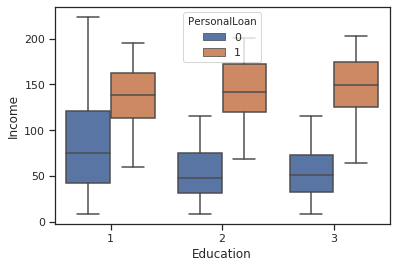

In [15]:
#Influence of Income and Education on personal loan
sns.boxplot(x="Education", y="Income", hue="PersonalLoan", data=df)

# Observation
It seems the customers whose Education is 1 and does not take loan are having more Income

Customers who have taken loan have same similar income levels

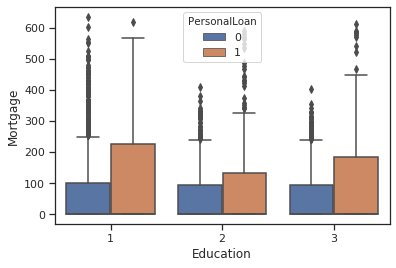

In [16]:
#Influence of Education and Mortgage on personal loan
sns.boxplot(x="Education", y='Mortgage', hue="PersonalLoan", data=df)

# Observation
It seems the Customers who have PersonalLoan have high Mortgage

Family  PersonalLoan
1       0               1365
        1                107
2       0               1190
        1                106
3       0                877
        1                133
4       0               1088
        1                134
dtype: int64


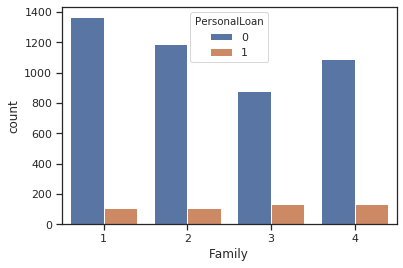

In [17]:
print(df.groupby(["Family", "PersonalLoan"]).size())
sns.countplot(x="Family", hue="PersonalLoan",data=df)

# Observation
Family with size of 3 and 4 are more likely to take PersonalLoan than others

Education  PersonalLoan
1          0               2003
           1                 93
2          0               1221
           1                182
3          0               1296
           1                205
dtype: int64


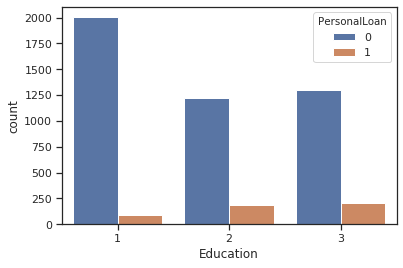

In [18]:
print(df.groupby(["Education", "PersonalLoan"]).size())
sns.countplot(x="Education", hue="PersonalLoan",data=df)

# Observation
Customers having Education level of 3 are more likely to take loan than level of 2 and 1 

SecuritiesAccount  PersonalLoan
0                  0               4058
                   1                420
1                  0                462
                   1                 60
dtype: int64


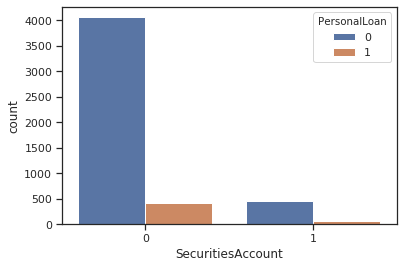

In [19]:
print(df.groupby(["SecuritiesAccount", "PersonalLoan"]).size())
sns.countplot(x="SecuritiesAccount", hue="PersonalLoan",data=df)

# Observation

Customers who does not have Personal Loan have security accounts

CDAccount  PersonalLoan
0          0               4358
           1                340
1          0                162
           1                140
dtype: int64


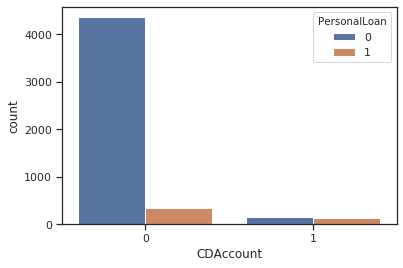

In [20]:
print(df.groupby(["CDAccount", "PersonalLoan"]).size())
sns.countplot(x="CDAccount", hue="PersonalLoan",data=df)

# Observation
Customers who have CD Account are most likely to take loan

Online  PersonalLoan
0       0               1827
        1                189
1       0               2693
        1                291
dtype: int64


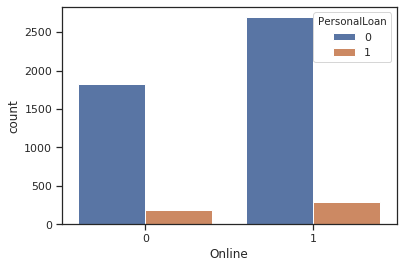

In [21]:
print(df.groupby(["Online", "PersonalLoan"]).size())
sns.countplot(x="Online", hue="PersonalLoan",data=df)

#Observation

Customers who are using online services are most likely to take a loan

CreditCard  PersonalLoan
0           0               3193
            1                337
1           0               1327
            1                143
dtype: int64


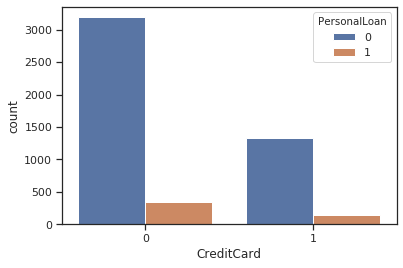

In [22]:
print(df.groupby(["CreditCard", "PersonalLoan"]).size())
sns.countplot(x='CreditCard', hue='PersonalLoan', data=df)

# Observation
Customer who don't have credit card are most likely to take a loan

In [23]:
print("Credit card spending of Non-Loan customers: ",df[df.PersonalLoan == 0]["CCAvg"].median()*1000)
print("Credit card spending of Loan customers    : ", df[df.PersonalLoan == 1]["CCAvg"].median()*1000)

Credit card spending of Non-Loan customers:  1400.0
Credit card spending of Loan customers    :  3800.0


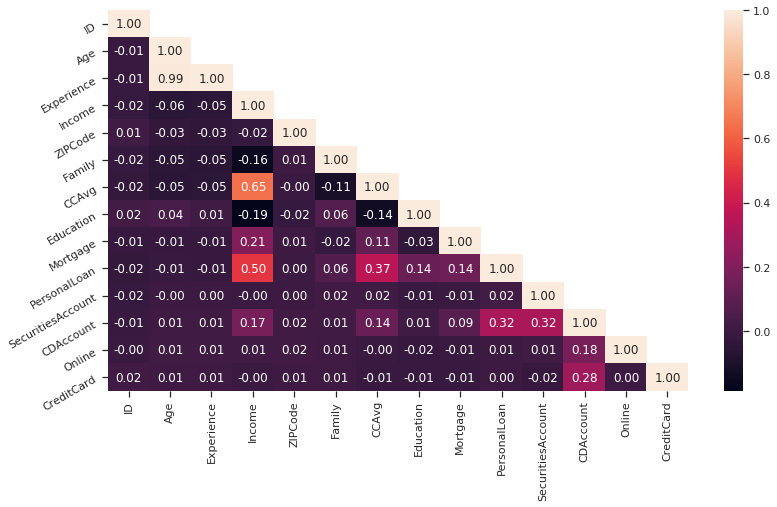

In [24]:
#Correlation with heat map
corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

#Observation

* Income and CCAvg is moderately correlated.
* Age and Experience is highly correlated

In [0]:
#Splitting data
train_set1, test_set = train_test_split(df.drop(["ID", "Experience", "CCAvg"], axis=1), 
                                       test_size=0.25 , random_state=0)
train_set, cv_set = train_test_split(train_set1, test_size=0.25, random_state=0)

In [0]:
train_labels = train_set.pop('PersonalLoan')
cv_labels = cv_set.pop('PersonalLoan')
test_labels = test_set.pop('PersonalLoan')

# Applying Logistic Regression with L2 regularization!

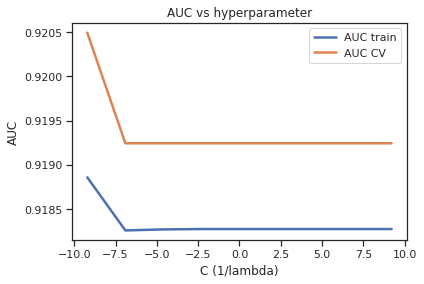

best lambda : 9999.0


In [27]:
C = [10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4] #C = 1/lambda
auc_train=[]
auc_cv=[]
for c in C:
    lr=LogisticRegression(penalty='l2',C=c)
    lr.fit(train_set,train_labels)
    probcv=lr.predict_proba(cv_set)[:,1]
    auc_cv.append(roc_auc_score(cv_labels,probcv))
    probtr=lr.predict_proba(train_set)[:,1]
    auc_train.append(roc_auc_score(train_labels,probtr))
optimal_c1 = C[auc_cv.index(max(auc_cv))]
C = [math.log(x) for x in C] #converting values of C into logarithm for graph purpose
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(C, auc_train, label='AUC train')
ax.plot(C, auc_cv, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('C (1/lambda)')
plt.ylabel('AUC')
ax.legend()
plt.show()
print('best lambda :',1//optimal_c1)

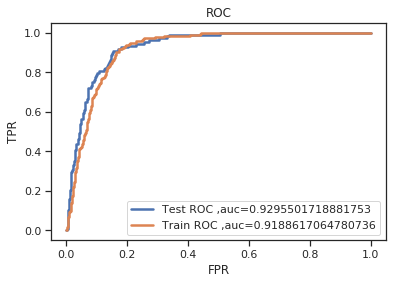

In [28]:
#roc for lambda = 9999.0
lr=LogisticRegression(penalty='l2',C=optimal_c1)
lr.fit(train_set,train_labels)
predi=lr.predict_proba(test_set)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(test_labels, predi)
pred=lr.predict_proba(train_set)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(train_labels,pred)
auc1 = roc_auc_score(test_labels,predi)
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(test_labels,predi)))
ax.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(train_labels,pred)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
ax.legend()
plt.show()

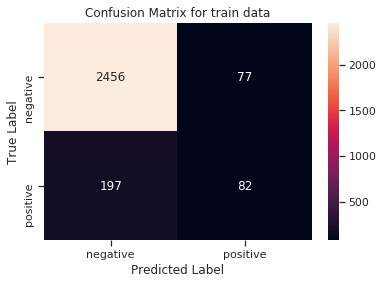

In [29]:
#Confusion matrix using heatmap for train data
lr=LogisticRegression(penalty='l2',C=optimal_c1)
lr.fit(train_set,train_labels)
predic=lr.predict(train_set)
conf_mat = confusion_matrix(train_labels, predic)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix for train data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

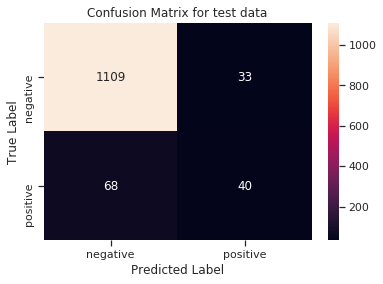

In [30]:
#Confusion matrix using heatmap for test data
lr=LogisticRegression(penalty='l2',C=optimal_c1)
lr.fit(train_set,train_labels)
predic=lr.predict(test_set)
conf_mat = confusion_matrix(test_labels, predic)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix for test data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [31]:
res1 = lr.score(test_set , test_labels)
print("Testing accuracy: {:.2f}".format(res1*100))

Testing accuracy: 91.92


# Applying DecisionTreeClassifier 

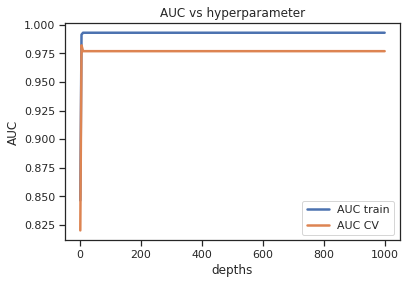

best depth: 5
best minimum samples split 100


In [32]:
depths = [1, 5, 10, 50, 100, 500, 1000]
best_m = []
min_samples = [2, 5, 10, 15, 100, 500]
auc_train = []
auc_cv = []
for d in depths:
    ms,rc = 0,0
    for m in min_samples:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_split=m)
        dt.fit(train_set,train_labels)
        probc = dt.predict_proba(cv_set)[:,1]
        val = roc_auc_score(cv_labels,probc)
        if val > rc:
            rc = val
            ms = m
    dt = DecisionTreeClassifier(max_depth = d, min_samples_split = ms)
    dt.fit(train_set,train_labels)
    probcv = dt.predict_proba(cv_set)[:,1]
    auc_cv.append(roc_auc_score(cv_labels,probcv))
    best_m.append(ms)
    probtr = dt.predict_proba(train_set)[:,1]
    auc_train.append(roc_auc_score(train_labels,probtr))
    
optimal_depth = depths[auc_cv.index(max(auc_cv))]
optimal_min_samples_split = best_m[auc_cv.index(max(auc_cv))]

fig = plt.figure()
ax = plt.subplot(111)
ax.plot(depths, auc_train, label='AUC train')
ax.plot(depths, auc_cv, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('depths')
plt.ylabel('AUC')
ax.legend()
plt.show()
print("best depth:",optimal_depth)
print("best minimum samples split", optimal_min_samples_split)

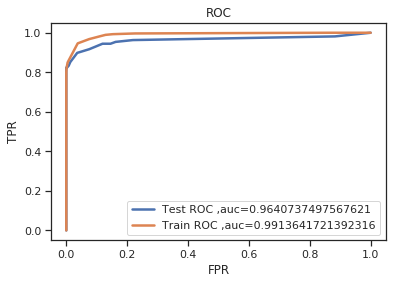

In [33]:
#training our model for max_depth=5, min_samples_split=100
#ROC curve
dt = DecisionTreeClassifier(max_depth = optimal_depth, min_samples_split = optimal_min_samples_split)
dt.fit(train_set,train_labels)
predi = dt.predict_proba(test_set)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(test_labels, predi)
pred = dt.predict_proba(train_set)[:,1]
fpr2,tpr2,thresholds2 = metrics.roc_curve(train_labels,pred)
auc2 = roc_auc_score(test_labels,predi)
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(fpr1, tpr1, label = 'Test ROC ,auc=' + str(roc_auc_score(test_labels,predi)))
ax.plot(fpr2, tpr2, label = 'Train ROC ,auc=' + str(roc_auc_score(train_labels,pred)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
ax.legend()
plt.show()

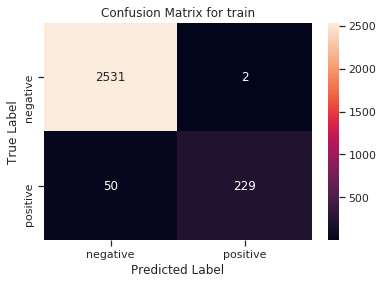

In [34]:
#Confusion matrix using heatmap for train data
dt = DecisionTreeClassifier(max_depth = optimal_depth, min_samples_split = optimal_min_samples_split)
dt.fit(train_set,train_labels)
predic=dt.predict(train_set)
conf_mat = confusion_matrix(train_labels, predic)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix for train")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

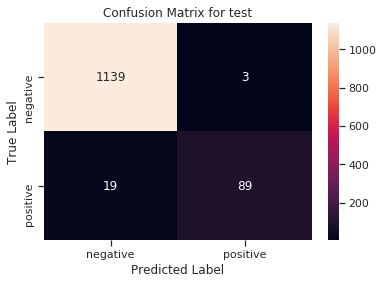

In [35]:
#Confusion matrix using heatmap for train data
dt = DecisionTreeClassifier(max_depth = optimal_depth, min_samples_split = optimal_min_samples_split)
dt.fit(train_set,train_labels)
predic=dt.predict(test_set)
conf_mat = confusion_matrix(test_labels, predic)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix for test")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [36]:
res2 = dt.score(test_set,test_labels)
print("Testing accuracy: {:.2f}".format(res2*100))

Testing accuracy: 98.24


# Applying KNeighborsClassifier with Brute Force Algorithm



Best k is : 63
Auc score : 0.9201056181205065


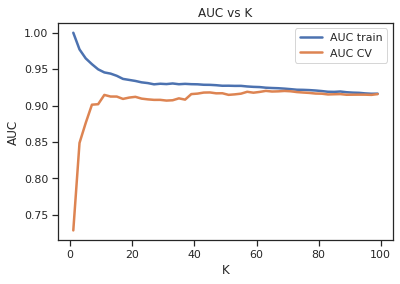

In [37]:
auc_cv=[]
auc_train=[]
max_auc_score=0
K=list(range(1,100,2))
cv_scores=[]
for i in K:
    knn=KNeighborsClassifier(n_neighbors=i, weights='uniform', algorithm='brute', leaf_size=30, p=2, metric='cosine')
    knn.fit(train_set, train_labels)
    pred = knn.predict_proba(cv_set)[:,1]
    auc_cv.append(roc_auc_score(cv_labels,pred))
    pred1=knn.predict_proba(train_set)[:,1]
    auc_train.append(roc_auc_score(train_labels,pred1))  
    
    #finding best k using max value of auc score
    if roc_auc_score(cv_labels,pred) > max_auc_score:
        k_best = i
        max_auc_score = roc_auc_score(cv_labels,pred)
    
print("Best k is :", k_best)        
print("Auc score :",max_auc_score)
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(K, auc_train, label='AUC train')
ax.plot(K, auc_cv, label='AUC CV')
plt.title('AUC vs K')
plt.xlabel('K')
plt.ylabel('AUC')
ax.legend()
plt.show()

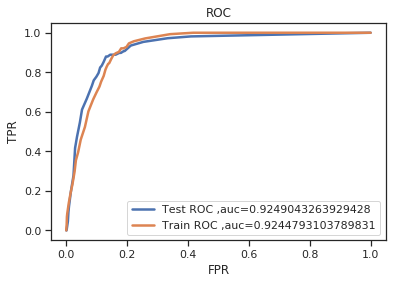

In [38]:
#ROC curve for k=63
#from above statistics we take k=63 as our best hyperparameter
knn=KNeighborsClassifier(n_neighbors = k_best, weights='uniform', algorithm='brute', leaf_size=30, p=2, metric='cosine')
knn.fit(train_set,train_labels)
pred1=knn.predict_proba(test_set)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(test_labels, pred1)
pred2=knn.predict_proba(train_set)[:,1]
fpr2,tpr2,thresholds2 = metrics.roc_curve(train_labels,pred2)
auc3 = roc_auc_score(test_labels,predi)
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(test_labels,pred1)))
ax.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(train_labels,pred2)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
ax.legend()
plt.show()

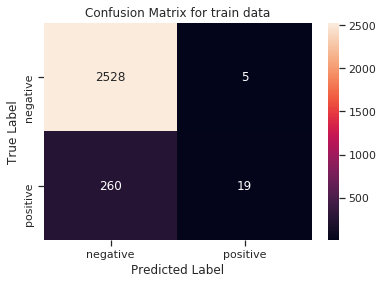

In [39]:
#Confusion matrix using heatmap for train data
knn=KNeighborsClassifier(n_neighbors=k_best,weights='uniform',algorithm='brute',leaf_size=30, p=2, metric='cosine')
knn.fit(train_set,train_labels)
predic=knn.predict(train_set)
conf_mat = confusion_matrix(train_labels, predic)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix for train data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

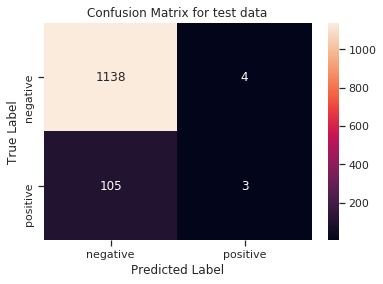

In [40]:
#Confusion matrix using heatmap for test data
knn=KNeighborsClassifier(n_neighbors=k_best,weights='uniform',algorithm='brute',leaf_size=30, p=2, metric='cosine')
knn.fit(train_set,train_labels)
predic=knn.predict(test_set)
conf_mat = confusion_matrix(test_labels, predic)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix for test data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [41]:
res3 = knn.score(test_set,test_labels)
print("Testing accuracy: {:.2f}".format(res3*100))

Testing accuracy: 91.28


# Applying KNeighborsClassifier with KD Tree Algorithm

Best k is : 33
Auc score : 0.8891327861551186


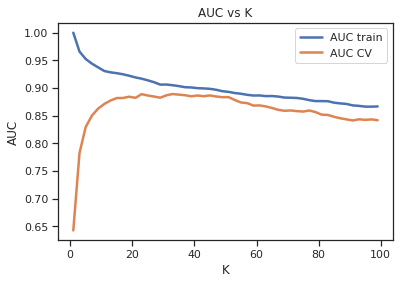

In [42]:
auc_cv=[]
auc_train=[]
K=[]
max_auc_score1=0
cv_scores=[]
for i in range(1,100,2):
    knn=KNeighborsClassifier(n_neighbors=i, weights='uniform', algorithm='kd_tree', leaf_size=30, p=2, 
                             metric='minkowski')
    knn.fit(train_set, train_labels)
    pred = knn.predict_proba(cv_set)[:,1]
    auc_cv.append(roc_auc_score(cv_labels,pred))
    pred1=knn.predict_proba(train_set)[:,1]
    auc_train.append(roc_auc_score(train_labels,pred1))
    K.append(i)
  
    
    #finding best k using max value of auc score
    if roc_auc_score(cv_labels,pred) > max_auc_score1:
        k_best1 = i
        max_auc_score1 = roc_auc_score(cv_labels,pred)
    
print("Best k is :", k_best1)        
print("Auc score :",max_auc_score1)
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(K, auc_train, label='AUC train')
ax.plot(K, auc_cv, label='AUC CV')
plt.title('AUC vs K')
plt.xlabel('K')
plt.ylabel('AUC')
ax.legend()
plt.show()

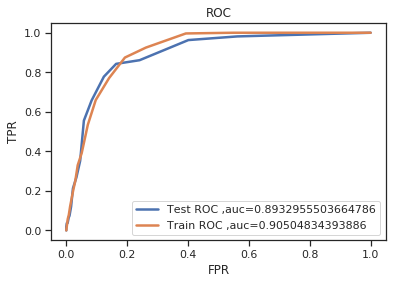

In [43]:
#ROC curve for k=33
#from above statistics we take k=33 as our best hyperparameter
knn=KNeighborsClassifier(n_neighbors = k_best1, weights='uniform', algorithm='kd_tree', leaf_size=30, p=2, 
                         metric='minkowski')
knn.fit(train_set,train_labels)
pred1=knn.predict_proba(test_set)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(test_labels, pred1)
pred2=knn.predict_proba(train_set)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(train_labels,pred2)
auc4 = roc_auc_score(test_labels,predi)
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(test_labels,pred1)))
ax.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(train_labels,pred2)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
ax.legend()
plt.show()

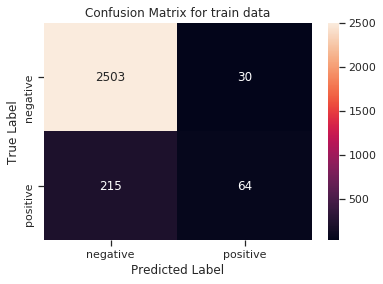

In [44]:
#Confusion matrix using heatmap for train data
knn=KNeighborsClassifier(n_neighbors=k_best1,weights='uniform',algorithm='brute',leaf_size=30, p=2, metric='cosine')
knn.fit(train_set,train_labels)
predic=knn.predict(train_set)
conf_mat = confusion_matrix(train_labels, predic)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix for train data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

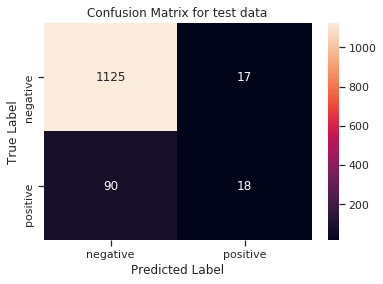

In [45]:
#Confusion matrix using heatmap for test data
knn=KNeighborsClassifier(n_neighbors=k_best1,weights='uniform',algorithm='brute',leaf_size=30, p=2, metric='cosine')
knn.fit(train_set,train_labels)
predic=knn.predict(test_set)
conf_mat = confusion_matrix(test_labels, predic)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix for test data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [46]:
res4 = knn.score(test_set,test_labels)
print("Testing accuracy: {:.2f}".format(res4*100))

Testing accuracy: 91.44


# Applying Multinomial Naive Bayes 

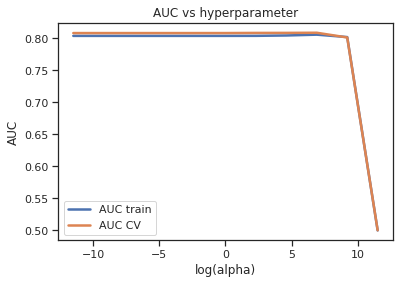

best alpha : 1000


In [47]:
from sklearn.naive_bayes import MultinomialNB
auc_train=[]
auc_cv=[]
#alpha from 10^-5 to 10^5
alpha_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
    
for i in alpha_values:
    mnb = MultinomialNB(alpha = i)
    mnb.fit(train_set,train_labels)
    pred=mnb.predict_proba(cv_set)[:,1]
    pred1=mnb.predict_proba(train_set)[:,1]
    auc_train.append(roc_auc_score(train_labels,pred1))
    auc_cv.append(roc_auc_score(cv_labels,pred))
    
optimal_alpha = alpha_values[auc_cv.index(max(auc_cv))]
alpha_values=[math.log(x) for x in alpha_values] #for graph purpose
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(alpha_values, auc_train, label='AUC train')
ax.plot(alpha_values, auc_cv, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('log(alpha)')
plt.ylabel('AUC')
ax.legend()
plt.show()
print('best alpha :',optimal_alpha)

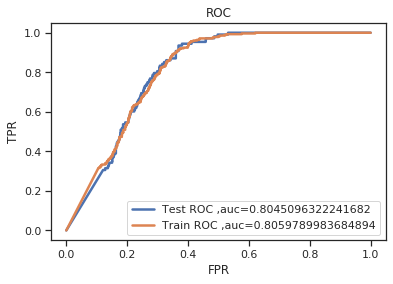

In [48]:
#ROC for alpha = 1000
mnb=MultinomialNB(alpha = optimal_alpha)
mnb.fit(train_set, train_labels)
predi=mnb.predict_proba(test_set)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(test_labels, predi)
pred=mnb.predict_proba(train_set)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(train_labels,pred)
auc5 = roc_auc_score(test_labels,predi)
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(test_labels,predi)))
ax.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(train_labels,pred)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
ax.legend()
plt.show()

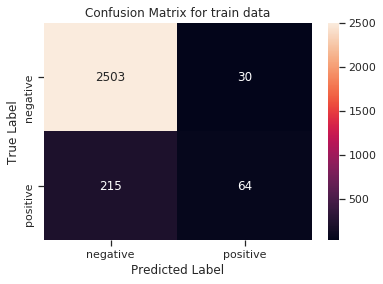

In [49]:
#Confusion matrix using heatmap for train data
mnb=MultinomialNB(alpha = optimal_alpha)
mnb.fit(train_set, train_labels)
predic=knn.predict(train_set)
conf_mat = confusion_matrix(train_labels, predic)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix for train data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

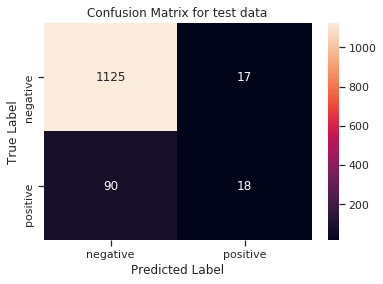

In [50]:
#Confusion matrix using heatmap for test data
mnb=MultinomialNB(alpha = optimal_alpha)
mnb.fit(train_set, train_labels)
predic=knn.predict(test_set)
conf_mat = confusion_matrix(test_labels, predic)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix for test data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [51]:
res5 = mnb.score(test_set,test_labels)
print("testing accuracy :{:.2f}".format(res5*100))

testing accuracy :79.92


# Applying Random Forest Classifier

In [52]:
base_learners = [20, 40, 60, 80, 100, 120]
depths = [1, 5, 10, 50, 100, 500, 1000]
param_grid = {'n_estimators': base_learners, 'max_depth':depths}
rf = RandomForestClassifier(max_features='sqrt')
model = GridSearchCV(rf, param_grid, scoring='roc_auc', n_jobs = -1, cv = 3)
model.fit(train_set, train_labels)
optimal_n_estimators = model.best_estimator_.n_estimators
optimal_max_depth = model.best_estimator_.max_depth
print("best n_estimators", optimal_n_estimators)
print("best max_depth", optimal_max_depth)

best n_estimators 60
best max_depth 500


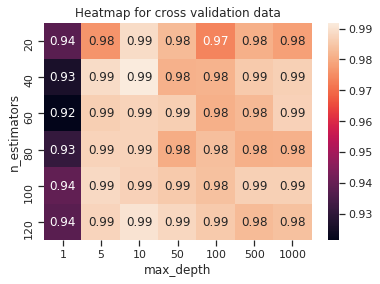

In [53]:
X = []
Y = []
auc_cv = []
auc_train = []
for bl in base_learners:
    for d in depths:
        rf = RandomForestClassifier(max_features = 'sqrt', max_depth = d, n_estimators = bl)
        rf.fit(train_set, train_labels)
        pred = rf.predict_proba(cv_set)[:,1]
        predt = rf.predict_proba(train_set)[:,1]
        X.append(bl)
        Y.append(d)
        auc_cv.append(roc_auc_score(cv_labels,pred))
        auc_train.append(roc_auc_score(train_labels,predt))
        
#heatmap for cv data
data = pd.DataFrame({'n_estimators': X, 'max_depth': Y, 'AUC': auc_cv})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted, annot=True)
plt.title('Heatmap for cross validation data')
plt.show()

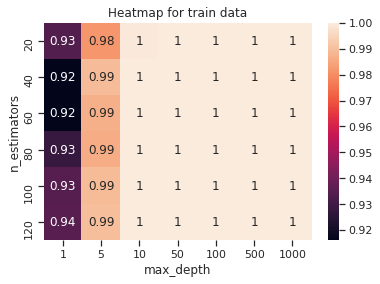

In [54]:
#heatmap for train data
data = pd.DataFrame({'n_estimators': X, 'max_depth': Y, 'AUC': auc_train})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted, annot=True)
plt.title('Heatmap for train data')
plt.show()

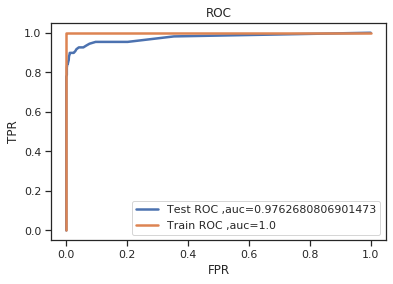

In [55]:
#roc curve
rf = RandomForestClassifier(max_features = 'sqrt', max_depth = optimal_max_depth, n_estimators = optimal_n_estimators)
rf.fit(train_set,train_labels)
predi = rf.predict_proba(test_set)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(test_labels, predi)
pred = rf.predict_proba(train_set)[:,1]
fpr2,tpr2,thresholds2 = metrics.roc_curve(train_labels,pred)
auc6 = roc_auc_score(test_labels,predi)
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(fpr1, tpr1, label='Test ROC ,auc=' + str(roc_auc_score(test_labels,predi)))
ax.plot(fpr2, tpr2, label='Train ROC ,auc=' + str(roc_auc_score(train_labels,pred)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
ax.legend()
plt.show()

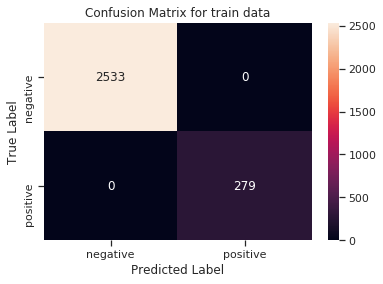

In [56]:
#Confusion matrix using heatmap for train data
predic = rf.predict(train_set)
conf_mat = confusion_matrix(train_labels, predic)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True, fmt="d")
plt.title("Confusion Matrix for train data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

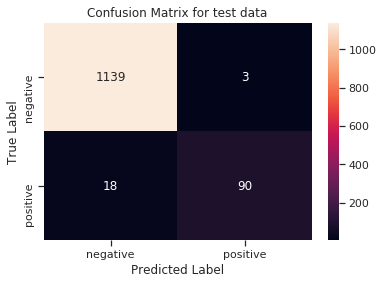

In [57]:
#Confusion matrix using heatmap for test data
predic = rf.predict(test_set)
conf_mat = confusion_matrix(test_labels, predic)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True, fmt="d")
plt.title("Confusion Matrix for test data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

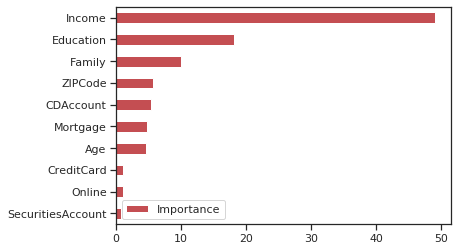

In [58]:
Importance = pd.DataFrame({'Importance':rf.feature_importances_*100}, index=train_set.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )

In [59]:
res6 = rf.score(test_set,test_labels)
print("Testing accuracy {:.2f}: ".format(res6*100))

Testing accuracy 98.32: 


# Applying Support Vector Machine

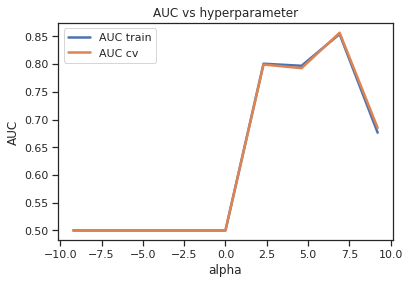

best alpha:  1000


In [60]:
alpha = [10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4] #alpha = 1 / C
auc_train=[]
auc_cv=[]
for i in alpha:
    model = SGDClassifier(alpha=i, loss='hinge') #loss default hinge
    svm = CalibratedClassifierCV(model, cv=3) #Probability calibration with isotonic regression or sigmoid.
    svm.fit(train_set,train_labels)
    probcv = svm.predict_proba(cv_set)[:,1]
    auc_cv.append(roc_auc_score(cv_labels,probcv))
    probtr = svm.predict_proba(train_set)[:,1]
    auc_train.append(roc_auc_score(train_labels,probtr))
optimal_alpha1 = alpha[auc_cv.index(max(auc_cv))]
alpha = [math.log(x) for x in alpha] #converting values of alpha into logarithm for graph purpose
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(alpha, auc_train, label="AUC train")
ax.plot(alpha, auc_cv, label="AUC cv")
plt.title("AUC vs hyperparameter")
plt.xlabel("alpha")
plt.ylabel("AUC")
ax.legend()
plt.show()
print("best alpha: ", optimal_alpha1)

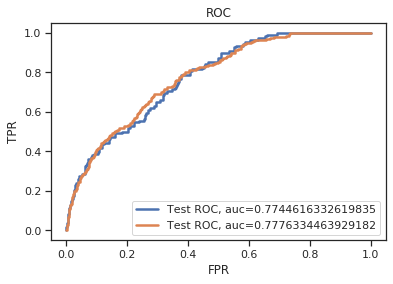

In [61]:
#training our model for alpha = 10
#ROC curve
model = SGDClassifier(alpha = optimal_alpha1)
svm = CalibratedClassifierCV(model, cv = 3)
svm.fit(train_set,train_labels)
predi = svm.predict_proba(test_set)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(test_labels, predi)
pred = svm.predict_proba(train_set)[:,1]
fpr2, tpr2, thresholds2 = metrics.roc_curve(train_labels, pred)
auc7 = roc_auc_score(test_labels,predi)
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(fpr1, tpr1, label = "Test ROC, auc=" + str(roc_auc_score(test_labels, predi)))
ax.plot(fpr2, tpr2, label = "Test ROC, auc=" + str(roc_auc_score(train_labels, pred)))
plt.title("ROC")
plt.xlabel("FPR")
plt.ylabel("TPR")
ax.legend()
plt.show()

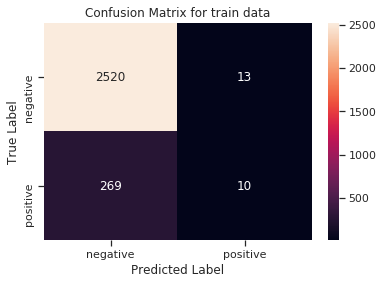

In [62]:
#confusion matrix for train data
predi = svm.predict(train_set)
conf_mat = confusion_matrix(train_labels, predi)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True, fmt="d")
plt.title("Confusion Matrix for train data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

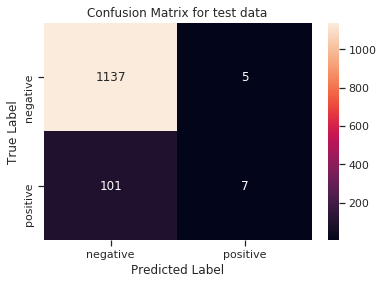

In [63]:
#confusion matrix for train data
predi = svm.predict(test_set)
conf_mat = confusion_matrix(test_labels, predi)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True, fmt="d")
plt.title("Confusion Matrix for test data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [64]:
res7 = svm.score(test_set,test_labels)
print("Testing accuracy {:.2f}".format(res7*100))

Testing accuracy 91.52


# Applying Gradient Boosting

best depth :  5
best n_estimator :  20


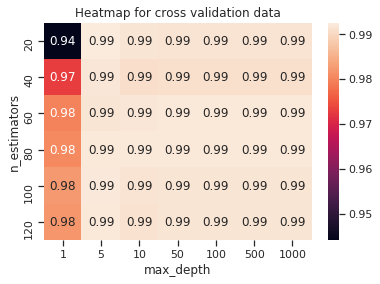

In [65]:
base_learners = [20, 40, 60, 80, 100, 120]
depths = [1, 5, 10, 50, 100, 500, 1000]

X = []
Y = []
auc_cv = []
auc_train = []
for bl in base_learners:
    for d in depths:
        gbdt=XGBClassifier(booster = 'gbtree' ,max_depth = d, n_estimators = bl)
        gbdt.fit(train_set,train_labels)
        pred = gbdt.predict_proba(cv_set)[:,1]
        predt = gbdt.predict_proba(train_set)[:,1]
        X.append(bl)
        Y.append(d)
        auc_cv.append(roc_auc_score(cv_labels,pred))
        auc_train.append(roc_auc_score(train_labels,predt))
optimal_depth1 = Y[auc_cv.index(max(auc_cv))]   
optimal_n_estimator1 = X[auc_cv.index(max(auc_cv))]

print("best depth : ",optimal_depth1)
print("best n_estimator : ",optimal_n_estimator1)

#Heatmap for cross validation data        
data = pd.DataFrame({'n_estimators': X, 'max_depth': Y, 'AUC': auc_cv})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for cross validation data')
plt.show()

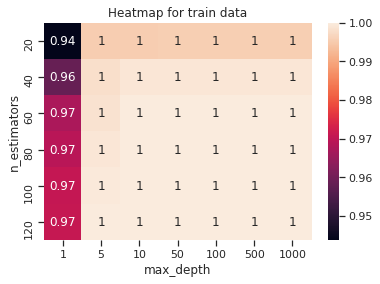

In [66]:
#Heatmap for train data
data = pd.DataFrame({'n_estimators': X, 'max_depth': Y, 'AUC': auc_train})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted, annot=True)
plt.title('Heatmap for train data')
plt.show()

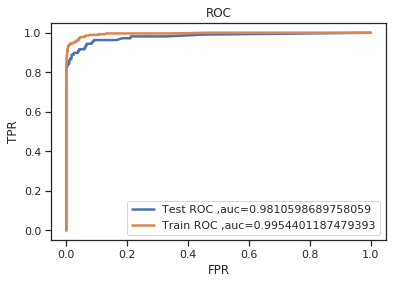

In [67]:
gbdt = XGBClassifier(booster = 'gbtree' ,max_depth = optimal_depth1, n_estimators = optimal_n_estimator1)
gbdt.fit(train_set,train_labels)
predi = gbdt.predict_proba(test_set)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(test_labels, predi)
pred = gbdt.predict_proba(train_set)[:,1]
fpr2,tpr2,thresholds2 = metrics.roc_curve(train_labels,pred)
fig = plt.figure()
auc8 = roc_auc_score(test_labels,predi)
ax = plt.subplot(111)
ax.plot(fpr1, tpr1, label = 'Test ROC ,auc=' + str(roc_auc_score(test_labels,predi)))
ax.plot(fpr2, tpr2, label = 'Train ROC ,auc=' + str(roc_auc_score(train_labels,pred)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
ax.legend()
plt.show()

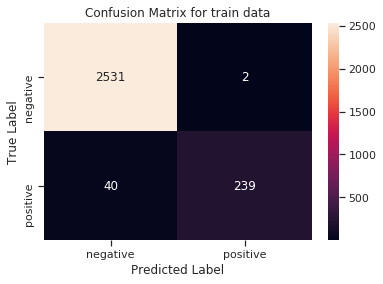

In [68]:
#Confusion matrix using heatmap for train data
predic = gbdt.predict(train_set)
conf_mat = confusion_matrix(train_labels, predic)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix for train data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

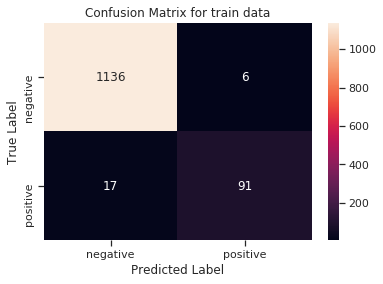

In [69]:
#Confusion matrix using heatmap for train data
predic = gbdt.predict(test_set)
conf_mat = confusion_matrix(test_labels, predic)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix for train data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [70]:
res8 = gbdt.score(test_set,test_labels)
print("Testing accuracy: {:.2f}".format(res8*100))

Testing accuracy: 98.16


In [71]:
#Conclusions
from prettytable import PrettyTable    
x = PrettyTable() 
x.field_names = ["Model","optimal hyper parameter", "AUC" ,"Result"]
x.add_row(['Logistic Regression', optimal_c1, auc1, "{:.2f}".format(res1*100)])
x.add_row(['Decision Tree', optimal_depth, auc2, "{:.2f}".format(res2*100)])
x.add_row(['KNN Brute Force', k_best, auc3, "{:.2f}".format(res3*100)])
x.add_row(['KNN KD tree', k_best1, auc4, "{:.2f}".format(res4*100)])
x.add_row(['Multi Nomial Bayes', optimal_alpha, auc5, "{:.2f}".format(res5*100)])
x.add_row(['Random Forest',optimal_max_depth, auc6, "{:.2f}".format(res6*100)])
x.add_row(['Support Vector Machine',optimal_alpha1, auc7, "{:.2f}".format(res7*100)])
x.add_row(['Gradient Boosting',optimal_depth1, auc8, "{:.2f}".format(res8*100)])

print(x)

+------------------------+-------------------------+--------------------+--------+
|         Model          | optimal hyper parameter |        AUC         | Result |
+------------------------+-------------------------+--------------------+--------+
|  Logistic Regression   |          0.0001         | 0.9295501718881753 | 91.92  |
|     Decision Tree      |            5            | 0.9640737497567621 | 98.24  |
|    KNN Brute Force     |            63           | 0.9640737497567621 | 91.28  |
|      KNN KD tree       |            33           | 0.9640737497567621 | 91.44  |
|   Multi Nomial Bayes   |           1000          | 0.8045096322241682 | 79.92  |
|     Random Forest      |           500           | 0.9762680806901473 | 98.32  |
| Support Vector Machine |           1000          | 0.7744616332619835 | 91.52  |
|   Gradient Boosting    |            5            | 0.9810598689758059 | 98.16  |
+------------------------+-------------------------+--------------------+--------+
